# Simple Linear Regression

# Dataset

Population of U.S. Cities

# Description

The bigcity data frame has 49 rows and 2 columns.
The measurements are the population (in 1000's) of 49 U.S. cities in 1920 and 1930. The 49 cities are a random sample taken
from the 196 largest cities in 1920.

# Format

This data frame contains the following columns:

u The 1920 population.

x The 1930 population.

Source:

The data were obtained from

Cochran, W.G. (1977) Sampling Techniques. Third edition. John Wiley


# 1. Import the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# 2. Read the dataset given in file named 'bigcity.csv'.

In [2]:
data=pd.read_csv('bigcity.csv')
print(data.head(5))
print(data.info())
print(data.columns)

   Unnamed: 0    u    x
0           1  138  143
1           2   93  104
2           3   61   69
3           4  179  260
4           5   48   75
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Unnamed: 0  49 non-null     int64
 1   u           49 non-null     int64
 2   x           49 non-null     int64
dtypes: int64(3)
memory usage: 1.3 KB
None
Index(['Unnamed: 0', 'u', 'x'], dtype='object')


In [3]:
data=data.drop("Unnamed: 0",axis=1)
print(data)

      u    x
0   138  143
1    93  104
2    61   69
3   179  260
4    48   75
5    37   63
6    29   50
7    23   48
8    30  111
9     2   50
10   38   52
11   46   53
12   71   79
13   25   57
14  298  317
15   74   93
16   50   58
17   76   80
18  381  464
19  387  459
20   78  106
21   60   57
22  507  634
23   50   64
24   77   89
25   64   77
26   40   60
27  136  139
28  243  291
29  256  288
30   94   85
31   36   46
32   45   53
33   67   67
34  120  115
35  172  183
36   66   86
37   46   65
38  121  113
39   44   58
40   64   63
41   56  142
42   40   64
43  116  130
44   87  105
45   43   61
46   43   50
47  161  232
48   36   54


# 3. See the realtionship between the two variables

<AxesSubplot:xlabel='u', ylabel='x'>

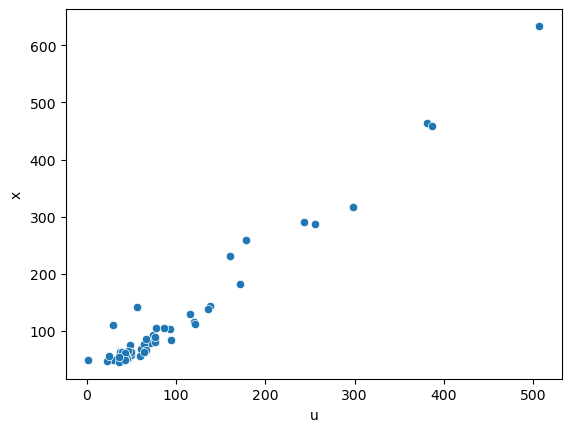

In [4]:
sb.scatterplot(data=data, x='u',y='x')

<AxesSubplot:xlabel='u', ylabel='x'>

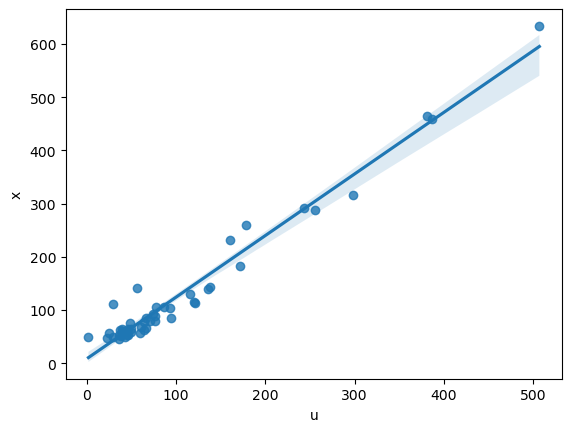

In [22]:
sb.regplot(data=data,x='u',y='x')

from above diagram we can conclude that the valus are positive linear regression.

# 4. Check the dataset for any missing values and also print out the correlation matrix 
You can use .isna() function to check for null values and .corr() / heatmap() to get the correlation coefficient

In [5]:
#for null data
print(data.isna().sum())

# for correlation between data
data_corr=data.corr()
print(data_corr)

u    0
x    0
dtype: int64
          u         x
u  1.000000  0.981742
x  0.981742  1.000000


<AxesSubplot:>

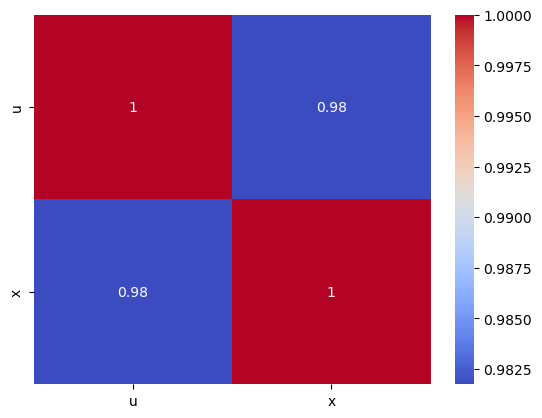

In [6]:
sb.heatmap(data_corr,cmap='coolwarm',annot=True)


The high correlation betwwen u and x indicates that the variable u is a good predictor of variable x

# 5. Seperate the input and output variables in the dataset
Find the number of rows in given dataset and separate the input and target variables into X and Y. 

Hint: You can use shape function to get the size of the dataframe

In [15]:
#for number of rows in X
rows=data.shape[0]
print(rows)
X=data['u']
Y=data['x']
#reshaping for 2D array
X = X.values.reshape(len(X),1) 
Y = Y.values.reshape(len(Y),1)

49


# 6. Split data into train, test sets 

Divide the data into training and test sets with 80-20 split using scikit-learn. 

Print the shapes of training and test feature sets.

*Check: train_test_split function

In [12]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.20,random_state=1)

# 7. Build Linear Regression Model
Use LinearRegression() algorithm from sklearn.linear_model

In [13]:
#ivoking Linear Regression model
regressor=LinearRegression()
regressor.fit(X_train,Y_train)

LinearRegression()

# 8. Find coefficients & intercept 

*Check: coef_ and intercept_ functions can help you get coefficients & intercept

In [16]:
#for coefficient and intercept value
b1=regressor.coef_
b0=regressor.intercept_
print('b1 is coefficient:',b1)
print('b0 is intercept:',b0)

b1 is coefficient: [[1.15945123]]
b0 is intercept: [9.71845532]


# 9. Evaluation of model with scikit-learn 

Validate the model with Root Mean Squares error and R^2 score using scikit-learn. 

RMSE and R2 for test data and prediction

Hint: You can import mean_squared_error function & r2 (R square) from sklearn.metrics. 

Performing root operation over mean square error gives you root mean square error

In [29]:
Y_pred = regressor.predict(X_test)
#importing mean squared error and r^2 
from sklearn.metrics import mean_squared_error, r2_score
#importing square root from math
from math import sqrt
mse = mean_squared_error(Y_test, Y_pred)
rms = sqrt(mse)
r2Score = r2_score(Y_test, Y_pred)
print('The Root Mean Sq Error is:',rms,'R^2 error is:',r2Score)

The Root Mean Sq Error is: 23.385235190249123 R^2 error is: 0.9181922560396981


# 10. Calculate the accuracy of the model for both training and test data set 

Hint: .score() function

In [32]:
acc_Training=regressor.score(X_train,Y_train)
print('Accuracy of Training data:',acc_Training)

Accuracy of Training data: 0.9682175540860046


In [33]:
acc_Test=regressor.score(X_test,Y_test)
print('Accuracy of test data:',acc_Test)

Accuracy of test data: 0.9181922560396981
